In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

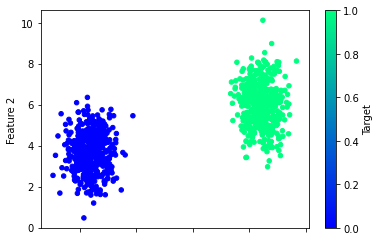

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.7839 - accuracy: 0.4560
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7636 - accuracy: 0.4747
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7463 - accuracy: 0.4907
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7305 - accuracy: 0.5080
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.5173
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5480
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5667
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5840
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6053
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6227
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

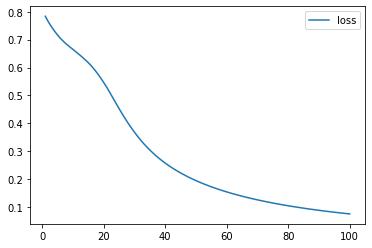

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

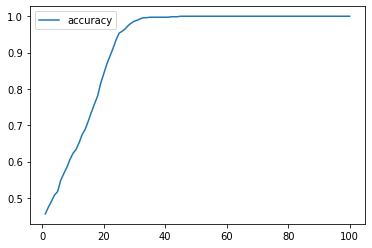

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0779 - accuracy: 1.0000 - 163ms/epoch - 20ms/step
Loss: 0.07788249105215073, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 86ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

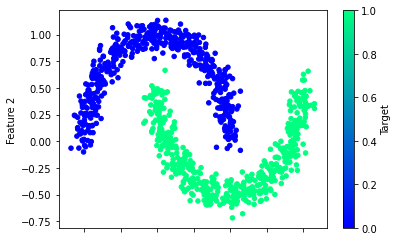

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.7147
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.7213
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.7333
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.7440
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7533
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7573
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7600
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4694 - accuracy: 0.7653
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.7680
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.7707
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

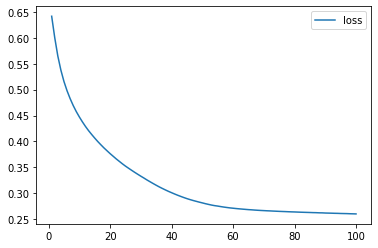

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

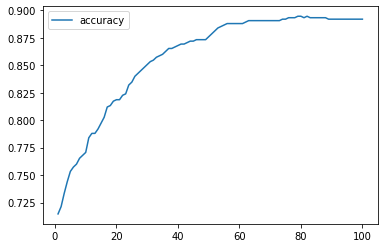

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.6111 - accuracy: 0.5933
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.6173
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.6573
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7493
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.8187
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8707
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.8773
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.8813
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.8813
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8813
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9040
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9053
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9053
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9053
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2103 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9067
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9067
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9067
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9080
Epoch 93/100


In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan          352
USA            324
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       159
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
UK              69
Philippines     47
Canada          41
India           31
Germany         27
Mexico          25
Australia       22
Netherlands     19
Nepal           14
Myanmar         14
Hungary          9
Pakistan         9
Bangladesh       7
Colombia         6
Brazil           5
Cambodia         5
Poland           4
Fiji             4
Finland          3
Sweden           3
Dubai            3
Estonia          2
Ghana            2
Nigeria          1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

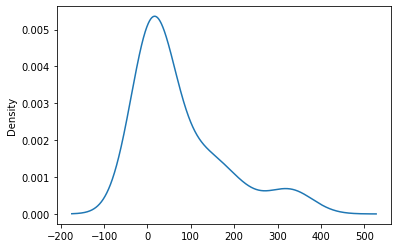

In [24]:
# Visualize the value counts
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")

# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          372
Japan          352
USA            324
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       159
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
import warnings
warnings.filterwarnings("ignore") 
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [31]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [32]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


<AxesSubplot:ylabel='Density'>

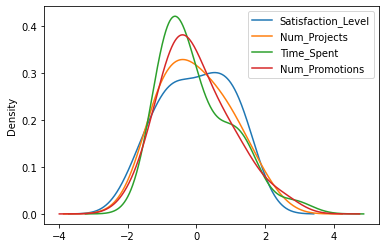

In [33]:
transformed_scaled_data.plot.density()

In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [36]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net
# 19.6.1: Question: Rerun all of the code in the “DeepLearning_Tabular” to prepare the input data and define
# the deep learning model. Does the output of nn.summary() look like the image generated below?
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model. Our first layer has 55 input values, and multiplied by the eight neurons
# (plus eight bias terms for each neuron) gives us a total of 448 weight parameters
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [46]:
# Compile the model 19.6.1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
31/35 [=========================>....] - ETA: 0s - loss: 0.1484 - accuracy: 0.9425 
Epoch 1: saving model to checkpoints\weights.01.hdf5
35/35 [==============================] - 1s 2ms/step - loss: 0.1471 - accuracy: 0.9437
Epoch 2/100
32/35 [==========================>...] - ETA: 0s - loss: 0.1383 - accuracy: 0.9502
Epoch 2: saving model to checkpoints\weights.02.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.9483
Epoch 3/100
29/35 [=======================>......] - ETA: 0s - loss: 0.1438 - accuracy: 0.9429
Epoch 3: saving model to checkpoints\weights.03.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.1419 - accuracy: 0.9437
Epoch 4/100
24/35 [===================>..........] - ETA: 0s - loss: 0.1352 - accuracy: 0.9557
Epoch 4: saving model to checkpoints\weights.04.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9483
Epoch 5/100
32/35 [==========================>...] - ETA: 0

Epoch 36/100
30/35 [========================>.....] - ETA: 0s - loss: 0.1154 - accuracy: 0.9563
Epoch 36: saving model to checkpoints\weights.36.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9592
Epoch 37/100
31/35 [=========================>....] - ETA: 0s - loss: 0.1154 - accuracy: 0.9567
Epoch 37: saving model to checkpoints\weights.37.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9546
Epoch 38/100
32/35 [==========================>...] - ETA: 0s - loss: 0.1154 - accuracy: 0.9561
Epoch 38: saving model to checkpoints\weights.38.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9583
Epoch 39/100
30/35 [========================>.....] - ETA: 0s - loss: 0.1142 - accuracy: 0.9573
Epoch 39: saving model to checkpoints\weights.39.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9592
Epoch 40/100
32/35 [==========================>...] 

35/35 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9655
Epoch 71/100
33/35 [===========================>..] - ETA: 0s - loss: 0.0905 - accuracy: 0.9640
Epoch 71: saving model to checkpoints\weights.71.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9655
Epoch 72/100
27/35 [======================>.......] - ETA: 0s - loss: 0.0804 - accuracy: 0.9711
Epoch 72: saving model to checkpoints\weights.72.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9682
Epoch 73/100
32/35 [==========================>...] - ETA: 0s - loss: 0.0878 - accuracy: 0.9668
Epoch 73: saving model to checkpoints\weights.73.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9673
Epoch 74/100
31/35 [=========================>....] - ETA: 0s - loss: 0.0893 - accuracy: 0.9667
Epoch 74: saving model to checkpoints\weights.74.hdf5
35/35 [==============================] - 0s 2ms/step

In [47]:
# Define the model - deep neural net 19.6.1
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.6848 - accuracy: 0.8587 - 213ms/epoch - 18ms/step
Loss: 0.6847661733627319, Accuracy: 0.8586956262588501


In [48]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [49]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [50]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.6848 - accuracy: 0.8587 - 183ms/epoch - 15ms/step
Loss: 0.6847661733627319, Accuracy: 0.8586956262588501


In [ ]:
# Our imported model was able to reproduce the exact same performance metrics as the original model. 
# Using this same procedure, we can import any type of Keras model for evaluation on a dataset with the same features.